#Importing neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from statistics import mode
from scipy import stats as scs
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']  =  [10, 5]
plt.rcParams['figure.dpi']  =  75
warnings.simplefilter(action = 'ignore', category = FutureWarning)

# Task 1.1(Data Manipulation using Python)     


Here are some indicative types of analysis you can perform. Please note that this is not an exhaustive list, you may add more


●	Come up with appropriate results for the following:

o	Analysis of percentage of default and check whether it is imbalanced data?

o	Replace missing values with appropriate techniques

o	Use the right treatment for outliers in the data

o	Analyse default variable with demographic related data

o	Determine and draw insights on association between default and other variables , both categorical and numerical.


Loading the Datasets

In [3]:
loan_df = pd.read_csv('Loan_details.csv')
status_df = pd.read_csv('Loan_status.csv')
Branch_df = pd.read_csv('Branch_region_mapping.csv')
loan_df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,0,0,0,0,650,0,5yrs 10mon,1
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,0,0,0,0,680,0,0yrs 9mon,0
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,0,0,0,0,825,0,2yrs 3mon,0
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,0,0,0,0,657,0,0yrs 6mon,2


In [4]:
status_df 

,Loan_id,loan_default
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
23310,23311,0
23311,23312,0
23312,23313,0
23313,23314,0


#Craeting Master dataframe by combining all subsidiary data

In [5]:
master_loandf = loan_df.join(Branch_df.set_index('branch_id'), on = 'branch_id' )
master_loandf = master_loandf.join(status_df.set_index('Loan_id'), on = 'Loan_id')
master_loandf


,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,South,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0,South,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,East,1
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,North,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1,South,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,0,0,0,0,650,0,5yrs 10mon,1,East,0
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,0,0,0,0,680,0,0yrs 9mon,0,East,0
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,0,0,0,0,825,0,2yrs 3mon,0,South,0
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,0,0,0,0,657,0,0yrs 6mon,2,East,0


Detecting and treating missing values

In [6]:
master_loandf.isnull().sum()

Loan_id                                  0
disbursed_amount                         0
asset_cost                               0
ltv                                      0
branch_id                                0
Date.of.Birth                            0
Employment.Type                        770
DisbursalDate                            0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS.SCORE                        0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      0
CREDIT.HISTORY.LENGTH                    0
NO.OF_INQUIRIES                          0
region                                   0
loan_default                             0
dtype: int64

In [7]:
len(master_loandf['Loan_id'].unique())# No duplicate value

23315

In [8]:
master_loandf['Employment.Type'].value_counts()

Self employed    12724
Salaried          9821
Name: Employment.Type, dtype: int64

In [9]:
# replacing Nan values with a string 
master_loandf.replace(to_replace = np.nan, value = 'Unemployed', inplace = True)
master_loandf
master_loandf.isnull().sum()

Loan_id                                0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
region                                 0
loan_default                           0
dtype: int64

In [10]:
master_loandf['Employment.Type'].value_counts()

Self employed    12724
Salaried          9821
Unemployed         770
Name: Employment.Type, dtype: int64

Detecting Outliers and treating the dataset for outliers

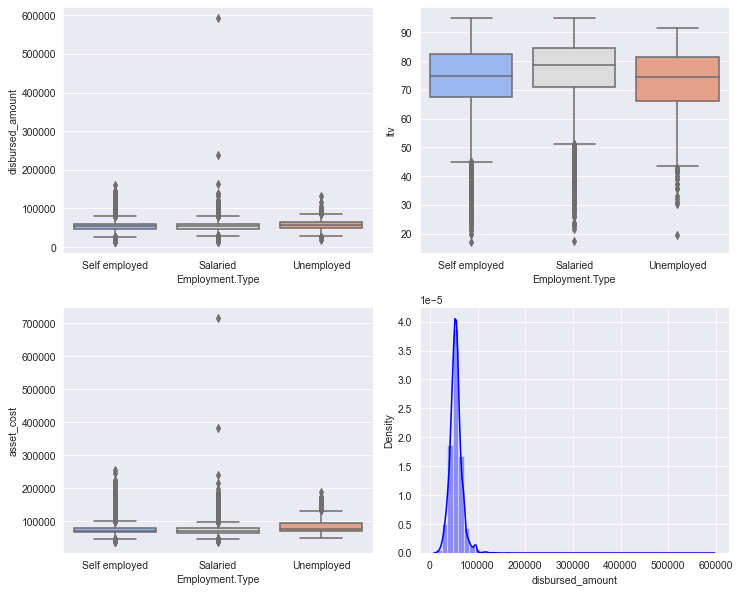

In [11]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x=master_loandf['Employment.Type'], y=master_loandf['disbursed_amount'], palette= 'coolwarm', ax = axs[0][0])
sns.boxplot(x=master_loandf['Employment.Type'], y=master_loandf['ltv'], palette= 'coolwarm', ax = axs[0][1])
sns.boxplot(x=master_loandf['Employment.Type'], y=master_loandf['asset_cost'], palette= 'coolwarm', ax = axs[1][0])
sns.distplot(a =master_loandf['disbursed_amount'], color = 'b', kde = True, ax = axs[1][1])
plt.tight_layout()

In [12]:
upper_limit = master_loandf['disbursed_amount'].quantile(0.9999)
lower_limit = master_loandf['disbursed_amount'].quantile(0.01)
print(upper_limit,lower_limit)

162078.69439999806 26336.0


In [13]:
master_loandf = master_loandf[master_loandf['disbursed_amount']<upper_limit]
master_loandf

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,South,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0,South,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,East,1
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,North,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1,South,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,0,0,0,0,650,0,5yrs 10mon,1,East,0
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,0,0,0,0,680,0,0yrs 9mon,0,East,0
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,0,0,0,0,825,0,2yrs 3mon,0,South,0
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,0,0,0,0,657,0,0yrs 6mon,2,East,0


Featurizing 'Age' to analyze demographic distribution of the dataset

In [14]:
DOB_series = pd.to_datetime(master_loandf['Date.of.Birth'])
Age_series = date.today().year - DOB_series.map(lambda dt: dt.year)
master_loandf['Age'] = Age_series
master_loandf

<ipython-input-14-02187dab6003>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_loandf['Age'] = Age_series


,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,South,0,31
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,...,0,0,0,783,0,2yrs 6mon,0,South,0,30
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,28
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,North,0,32
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,...,0,0,0,14,1,3yrs 1mon,1,South,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,...,0,0,0,650,0,5yrs 10mon,1,East,0,39
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,...,0,0,0,680,0,0yrs 9mon,0,East,0,28
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,...,0,0,0,825,0,2yrs 3mon,0,South,0,27
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,...,0,0,0,657,0,0yrs 6mon,2,East,0,39


#Assessing the dataset based on Defaulted status

In [15]:
dflt_pct = master_loandf['loan_default'].value_counts()[1]/len(master_loandf['loan_default'])*100
print('{:2f}%'.format(dflt_pct))

21.988675%


It suggests that the majority of the data belongs to the NotDefaulted category which may lead to majority oversampling if the whole dataset is considered for training the model

In [16]:
defaulted_df = master_loandf[master_loandf['loan_default']==1]
defaulted_df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,28
9,10,34639,69717,50.49,34,23-11-1982,Self employed,26-10-2018,1,1,...,0,0,0,300,0,3yrs 10mon,0,East,1,39
19,20,78151,107074,74.25,135,05-06-1987,Self employed,25-10-2018,1,1,...,1,0,0,0,0,0yrs 0mon,0,West,1,34
26,27,45795,61513,76.41,73,15-09-1978,Salaried,20-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,South,1,43
27,28,53303,63376,86.78,3,16-09-1989,Salaried,07-09-2018,1,1,...,0,0,0,710,0,0yrs 6mon,0,East,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23279,23280,39664,62270,66.28,36,02-09-1968,Salaried,09-08-2018,1,0,...,1,0,0,694,0,5yrs 1mon,0,East,1,53
23281,23282,49850,87344,58.39,138,01-01-1988,Self employed,06-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,West,1,33
23284,23285,43617,58075,79.90,105,01-01-1988,Salaried,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,West,1,33
23289,23290,53303,65728,83.68,16,01-01-1991,Salaried,08-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,30


Analyzing the dataset based on categorical data such as 'Region','Employment Type','CNS Score' and 'Delinquent Account count'

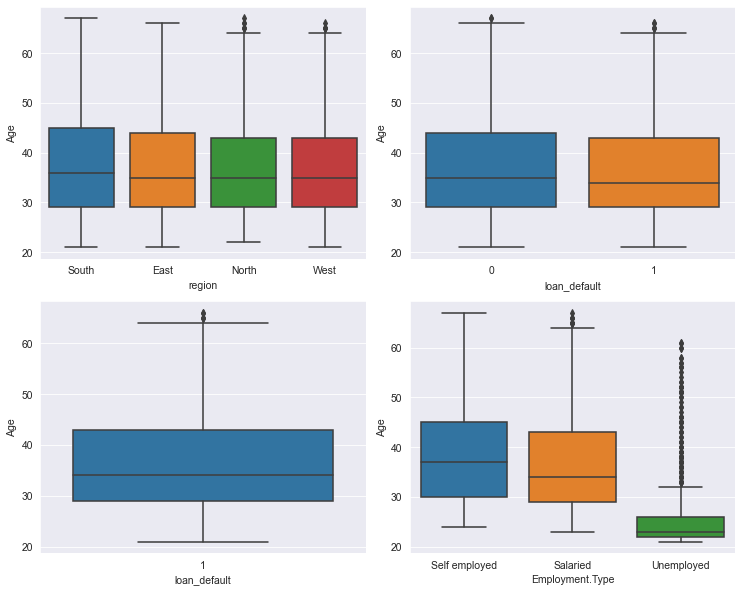

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
sns.boxplot(x = master_loandf['region'], y = master_loandf['Age'], ax= axs[0][0])
sns.boxplot(x = master_loandf['loan_default'], y = master_loandf['Age'], ax= axs[0][1])
sns.boxplot(x = defaulted_df['loan_default'], y = defaulted_df['Age'], ax= axs[1][0])
sns.boxplot(x = master_loandf['Employment.Type'], y = master_loandf['Age'], ax= axs[1][1])
plt.tight_layout()

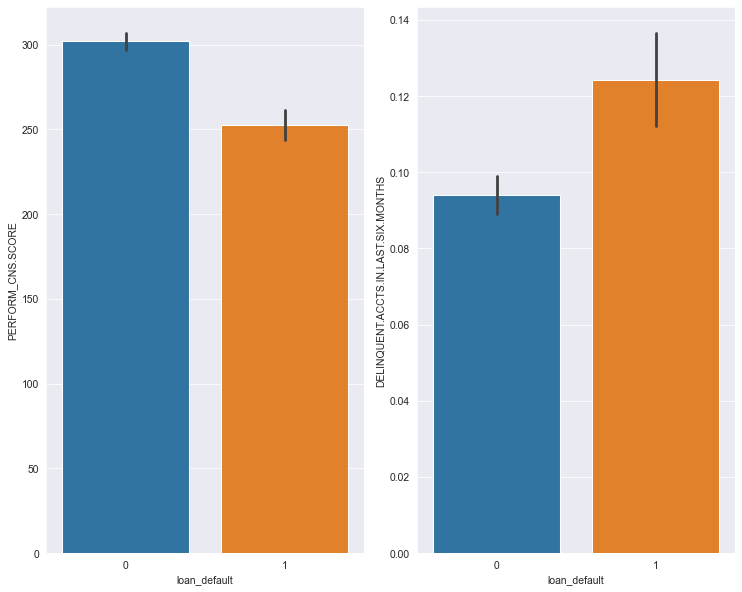

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10,8))
sns.barplot(x = master_loandf['loan_default'], y = master_loandf['PERFORM_CNS.SCORE'], ax = axs[0])
sns.barplot(x = master_loandf['loan_default'], y = master_loandf['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'], ax = axs[1])
plt.tight_layout()

# Conclusion: 

# From the above it can be deduced that lower age group is majorly unemployed and are more susceptible to default. Also, it can be understood that individuals with lower Bureau score and high Delinquent accounts are more susceptible to default.

# Task 1.3 (Statistical Analysis using Python)


o	Descriptive statistics for both numerical and categorical and draw few insights from them.

o	Perform relevant hypothesis testing (t, chi-Square, Anova tests) 


Plotting to understand The loan amount distribution

((array([-4.01491945, -3.80060369, -3.68340909, ...,  3.68340909,
          3.80060369,  4.01491945]),
  array([ 13369,  13600,  13664, ..., 144085, 144698, 161608], dtype=int64)),
 (12249.720948322622, 54262.05799588196, 0.9797903051071684))

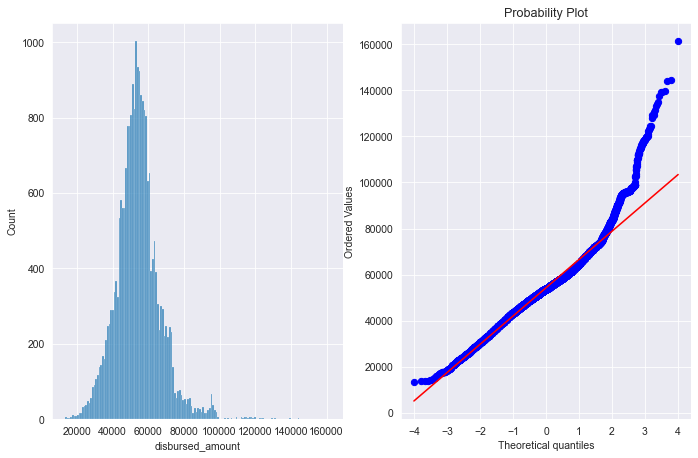

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(11,7))
sns.histplot(x = master_loandf['disbursed_amount'], ax = axs[0])
scs.probplot(master_loandf['disbursed_amount'], plot=plt )

In [20]:
disbursedamt_mean = np.mean(master_loandf['disbursed_amount'])
disbursedamt_median = np.median(master_loandf['disbursed_amount'])
disbursedamt_mode = mode(master_loandf['disbursed_amount'])
print('Mean:{}\nMedian:{}\nMode:{}'.format(disbursedamt_mean, disbursedamt_median,disbursedamt_mode))

Mean:54262.05799588195
Median:53759.0
Mode:53303


From the above visualization it is evident that the loan amount distribution is normal with a positive skew shown in both hist plot and Q-Q plot(the higher values shows higher variance). This is may be due to the loan base is being 
comprised of more than one group of people that based on employment type. To analyze the variance within the population contributed by different groups we need to conduct an ANOVA test otherwise if it were only 1 group a z test would have been sufficient.

Attempting infer the mean of disbursed loan amount based on Employment type, that is if the loan amount is significantly different among different groups.

In [21]:
loan_bygroup = master_loandf[['disbursed_amount',
                              'Employment.Type']].sort_values(by = 
                            'Employment.Type').reset_index(drop=True)
loan_bygroup

,disbursed_amount,Employment.Type
0,31484,Salaried
1,53603,Salaried
2,47249,Salaried
3,37641,Salaried
4,58812,Salaried
...,...,...
23307,50683,Unemployed
23308,61947,Unemployed
23309,49303,Unemployed
23310,54303,Unemployed


In [22]:
sample_loan_id = np.random.choice(loan_bygroup.index, int(len(loan_bygroup)/11))
sample_loan_bygroup = loan_bygroup[loan_bygroup.index.isin(sample_loan_id)].reset_index(drop=True)
sample_loan_bygroup.columns = ['disbursed_amount','Employment_Type']
sample_loan_bygroup

,disbursed_amount,Employment_Type
0,42394,Salaried
1,66332,Salaried
2,45349,Salaried
3,34484,Salaried
4,74079,Salaried
...,...,...
2032,57259,Unemployed
2033,49303,Unemployed
2034,47349,Unemployed
2035,70523,Unemployed


Hypothesis Testing to determine if the chosen sample represents the whole population
H₀: μ₁= x_bar  (population mean of disbursed amounts and the sample mean are equal)
H₁: μ₁!=x_bar (population mean of disbursed amounts and the sample mean are not equal)
α = 0.05

In [23]:
ztest ,pval = stests.ztest(sample_loan_bygroup['disbursed_amount'], x2=None, value=disbursedamt_mean)
print(float(pval))

0.5675028287358522


This indicates that the population mean is close to the sample mean and the null hypothesis cannot be rejected

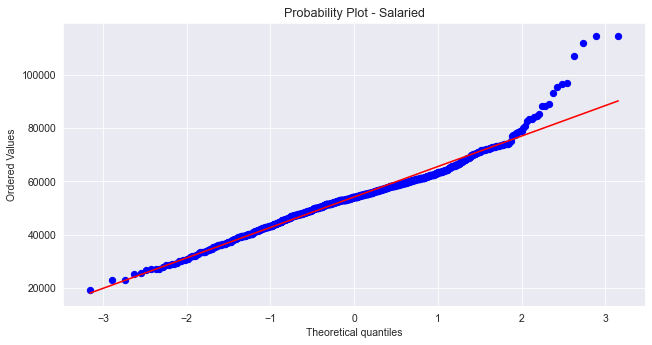

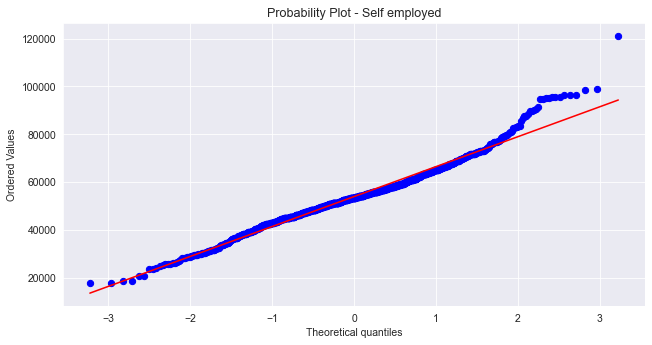

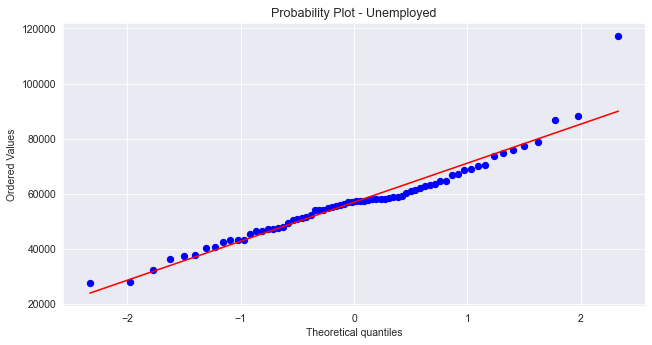

In [24]:
emp_type = sample_loan_bygroup['Employment_Type'].unique()
for typ in emp_type:
    scs.probplot(sample_loan_bygroup[sample_loan_bygroup['Employment_Type'] == typ]['disbursed_amount'], plot=plt)
    plt.title("Probability Plot - " +  typ)
    plt.show()

The above shows that the sample loan amount distrubution based on each employment type is normal.

Hypothesis Testing
H₀: μ₁= μ₂ = μ₃  (mean of disbursed amounts as per employment with in the population are equal)
H₁: Not all disbursed amount means as per category are equal
α = 0.05


Conducting ANOVA Test

In [27]:
model = ols('disbursed_amount ~ Employment_Type', data = sample_loan_bygroup).fit() #using regression of loan_amount of the whole sample on loan amount with different employment types 
anova_tb = sm.stats.anova_lm(model, typ=2)
print(anova_tb)

                       sum_sq      df         F    PR(>F)
Employment_Type  6.084234e+08     2.0  2.006793  0.134685
Residual         3.083361e+11  2034.0       NaN       NaN


# Conclusion: 

# From the above, applying p value approach we can say that p_value> significance of 0.05 and the null hypothesis cannot be rejected. So we conclude that various employment type do not contribute to insample variance. The loan amount is evenly distributed between different groups (between group ANOVA test). Similar conclusion is confirmed by a Boxplot in the prior section. We also conclude that the sample shows within group variance rather than between group variance.